In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [3]:
heart = pd.read_csv('heart_disease.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [26]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [27]:
#getting the numbver of people with heart disease

heart.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [28]:
#show the percentage of male ove female w
count_female= len(heart[heart.sex==0])
count_male= len(heart[heart.sex==1])

count_female


312

In [29]:
# Calculate the total number of samples
total_samples = len(heart)

# Calculate the percentage of females
percentage_female = (count_female / total_samples) * 100

# Calculate the percentage of males
percentage_male = (count_male / total_samples) * 100

print(f"%females: {percentage_female:.2f}%")
print(f"%males: {percentage_male:.2f}%")

Percentage of females: 30.44%
Percentage of males: 69.56%


In [30]:
heart.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.849359,1.006410,133.701923,261.455128,0.134615,0.573718,150.830128,0.237179,0.921154,1.410256,0.580128,2.137821,0.724359
1,53.814867,0.914446,130.697055,239.237027,0.155680,0.510519,148.363254,0.380084,1.137307,1.374474,0.830295,2.405330,0.420757


<Axes: xlabel='sex', ylabel='target'>

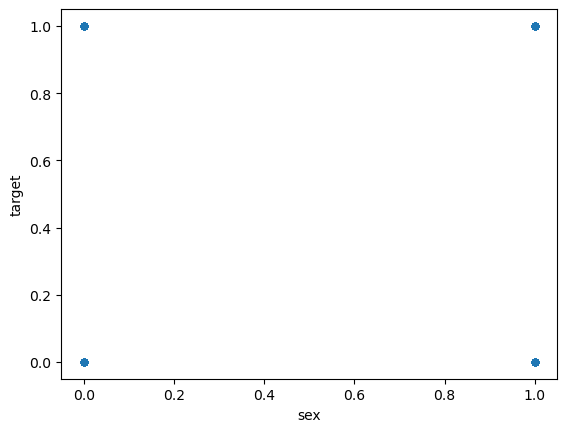

In [31]:
heart.plot(kind='scatter', x ="sex", y="target")

<Axes: xlabel='age'>

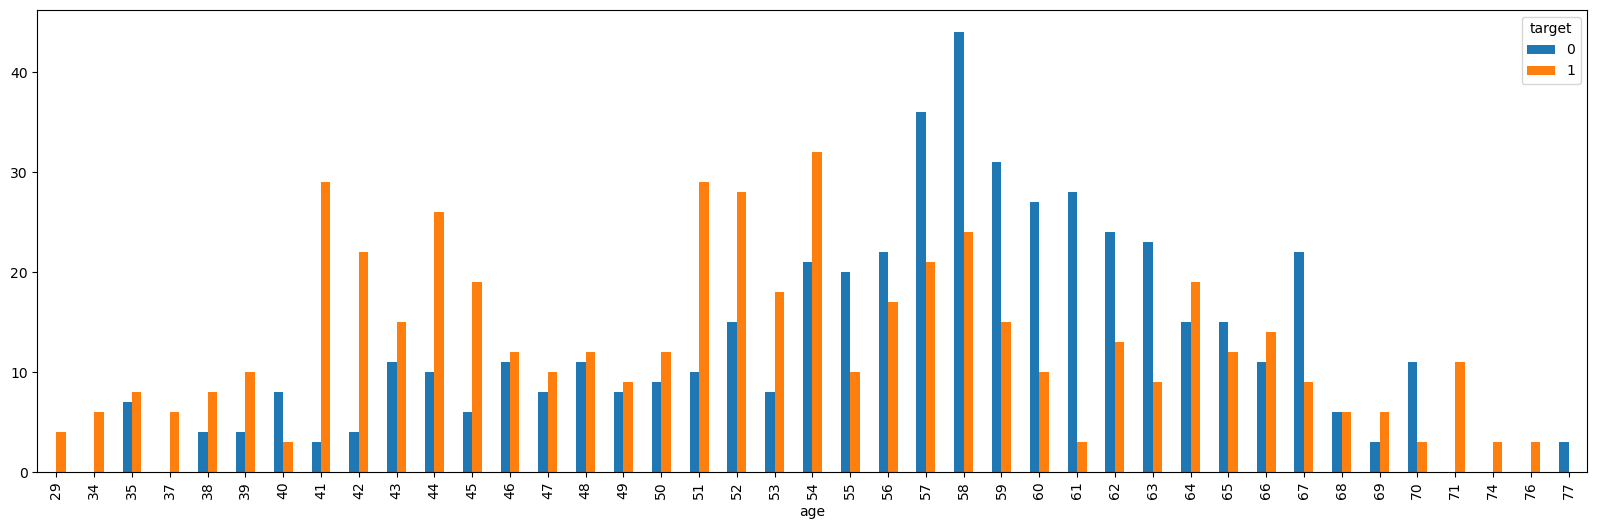

In [32]:
pd.crosstab(heart.age, heart.target).plot(kind='bar', figsize=(20,6))

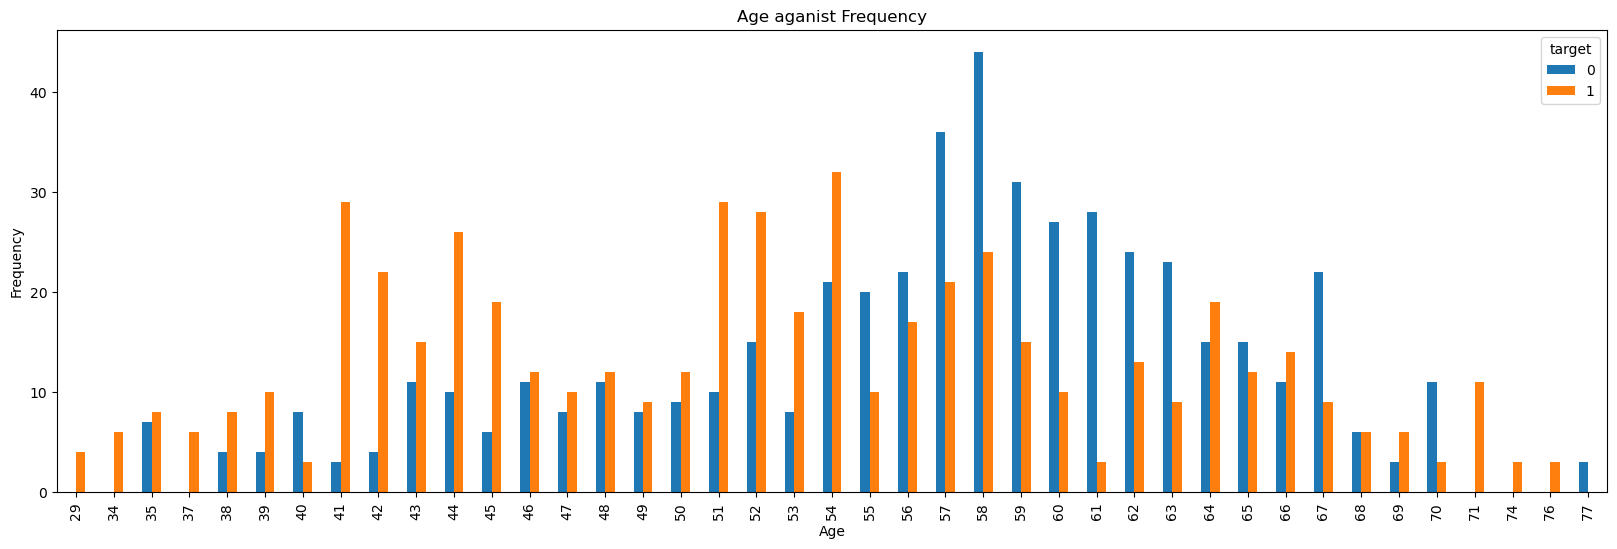

In [4]:
pd.crosstab(heart.age, heart.target).plot(kind='bar', figsize=(20,6))
plt.title("Age aganist Frequency")
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='age', ylabel='target'>

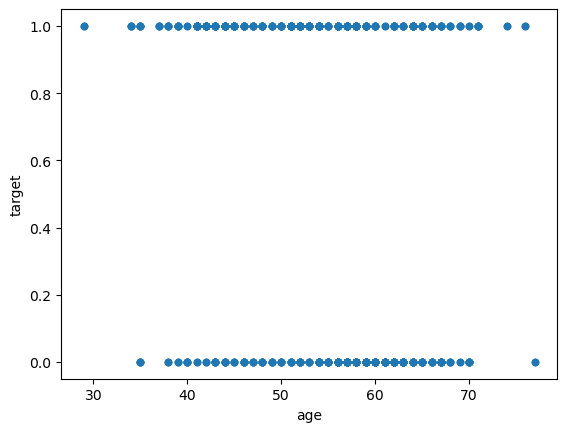

In [34]:
heart.plot(kind='scatter', x ="age", y="target")


<Axes: xlabel='age', ylabel='chol'>

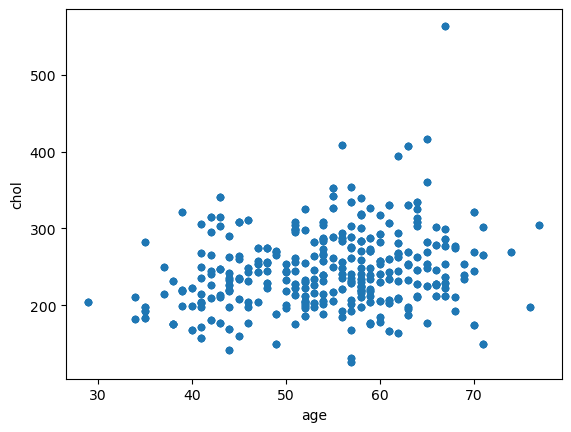

In [35]:
heart.plot(kind='scatter', x ="age", y="chol")

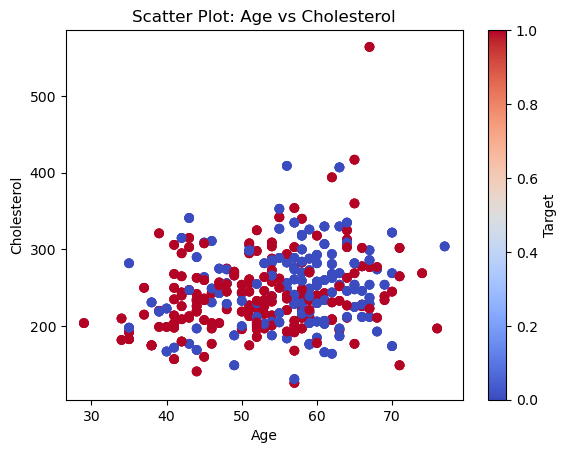

In [36]:
age = heart['age']
chol = heart['chol']

# Create scatter plot
plt.scatter(age, chol, c=disease['target'], cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot: Age vs Cholesterol')
plt.colorbar(label='Target')
plt.show()

In [37]:
#working with Machine learning model accuracy ....
#create model for logistic regression
#categorical prediction


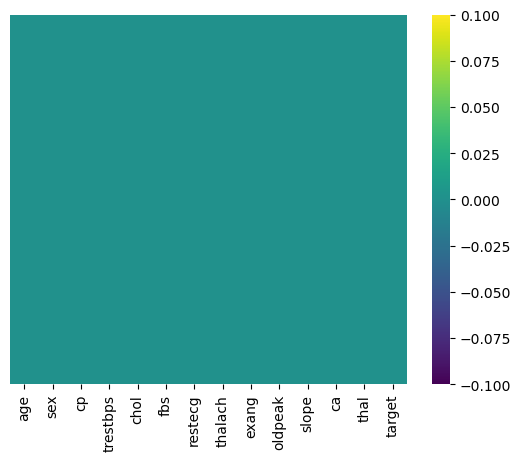

In [38]:
sns.heatmap(heart.isnull(), yticklabels=False, cmap='viridis')
plt.show()


<Axes: xlabel='sex', ylabel='age'>

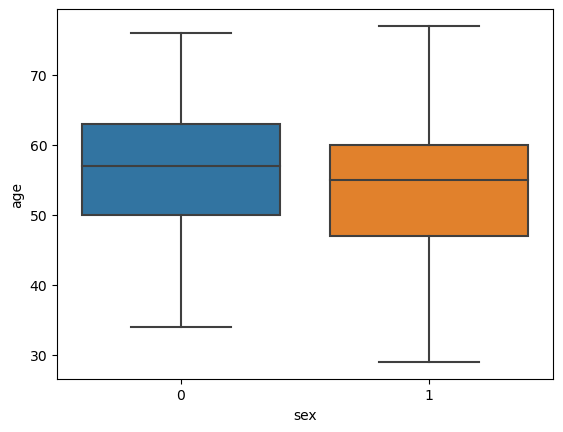

In [39]:
sns.boxplot(x='sex', y='age', data=heart)

<Axes: >

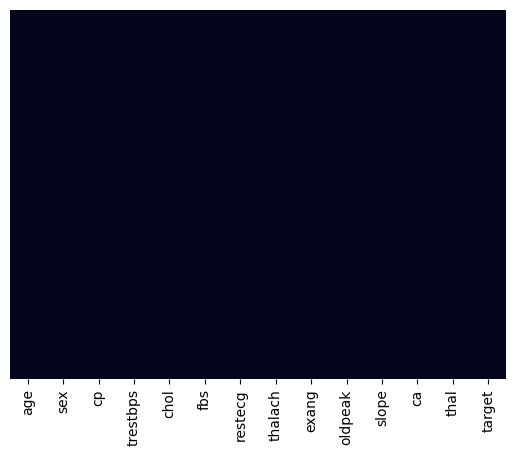

In [40]:
#checkking for the null reduced

sns.heatmap(heart.isnull(), yticklabels=False, cbar=False)

In [41]:
X=heart.drop('target', axis=1)
y=heart['target']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
logmodel=LogisticRegression()

In [44]:
# Create and fit the logistic regression model with 'liblinear' solver and increased max_iter
logmodel = LogisticRegression(solver='liblinear', max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [47]:

y_pred = logmodel.predict(X_test)

In [48]:
# Evaluate the model's performance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.79
Precision: 0.74
Recall: 0.87
F1-score: 0.80


In [49]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier
mymodel2 = DecisionTreeClassifier()


In [51]:


# Fit the model on the training data
mymodel2.fit(X_train, y_train)


DecisionTreeClassifier()

In [52]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[71 31]
 [13 90]]


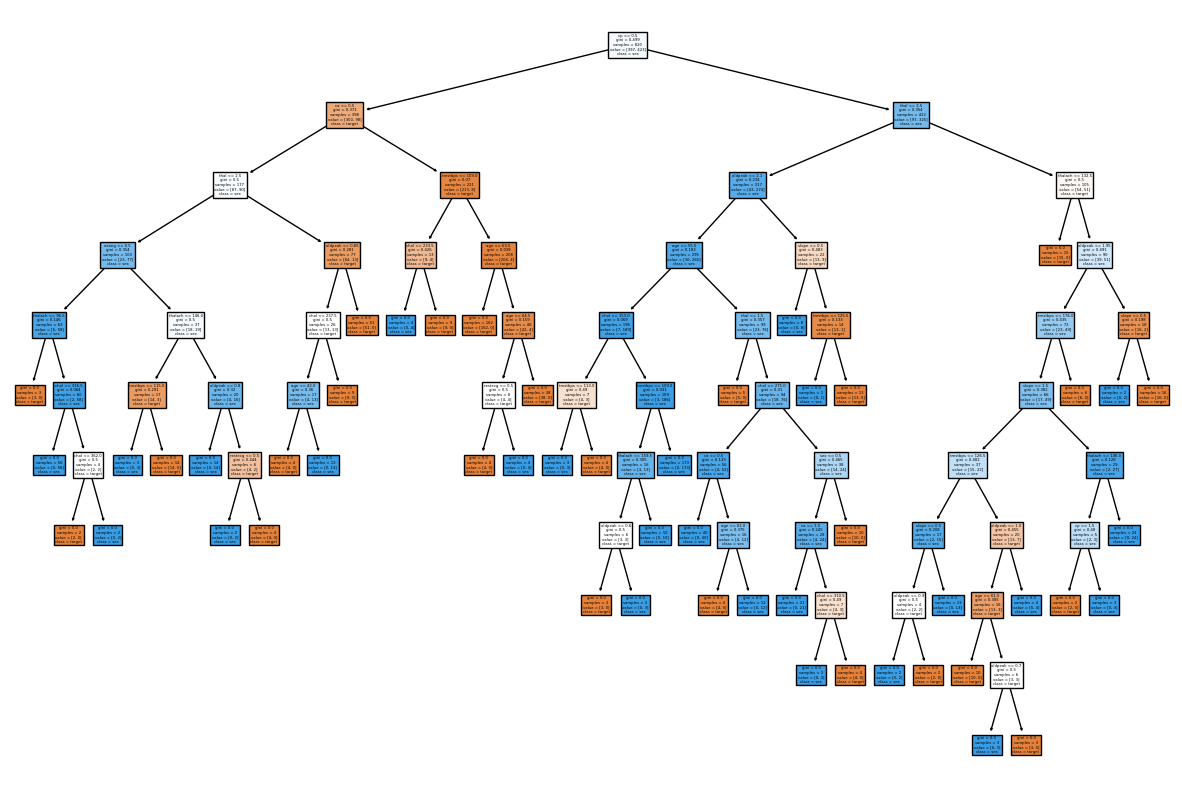

In [55]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(mymodel2, feature_names=X_train.columns, class_names=["target", "sex"], filled=True)
plt.show()
